In [14]:
# Authored by Ahmad Beirami
# Last modified April 20, 2020
# If you use this notebook, please cite https://arxiv.org/pdf/1801.09021.pdf


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import time

start = time.time()

p = np.array([0.6, 0.2, 0.1, 0.07]) 
A = len(p) 
N = 8
if A not in [2,3,4]:
    print("Error, Alphabet size", A, "not supported")
else:
    print("Alphabet size:", A)
    print("Probability vector:", p)
    
    
if A == 2:
    p = p/sum(p)
    p.sort()
    log_prob = []
    for i in range(N+1):
        j = N - i
        for num in range(np.int(math.factorial(N)/ math.factorial(i) / math.factorial(j))):
            log_prob.append(i * np.log2(p[0]) + j * np.log2(p[1]))
    prob = [2**l for l in log_prob]    

    

    
elif A == 3:
    p = p/sum(p)
    log_prob = []
    for i in range(N+1):
        for j in range(N - i+1):
            k = N - i - j
            for num in range(np.int(math.factorial(N)/ math.factorial(i) / math.factorial(j) / math.factorial(k))):
                log_prob.append(i * np.log2(p[0]) + j * np.log2(p[1]) + k *np.log2(p[2]))
    log_prob.sort(reverse = True)
    prob = [2**l for l in log_prob]


elif A == 4:
    p = p/sum(p)
    log_prob = []
    for i in range(N+1):
        for j in range(N- i+1):
            for k in range(N-i-j+1):
                l = N - i - j - k
                for num in range(np.int(math.factorial(N)/ math.factorial(i) / math.factorial(j) 
                                        / math.factorial(k)/ math.factorial(l))):
                    log_prob.append(i * np.log2(p[0]) + j * np.log2(p[1]) + k *np.log2(p[2]) + l*np.log2(p[3]))
    log_prob.sort(reverse = True)
    prob = [2**l for l in log_prob]
end = time.time()
print('total time for populating the probabilitues: ', end- start)


Alphabet size: 4
Probability vector: [0.6  0.2  0.1  0.07]
total time for populating the probabilitues:  0.6860642433166504


Alphabet size: 4
Probability vector: [0.6185567  0.20618557 0.10309278 0.07216495]
total time for computing the approximation:  52.63627099990845


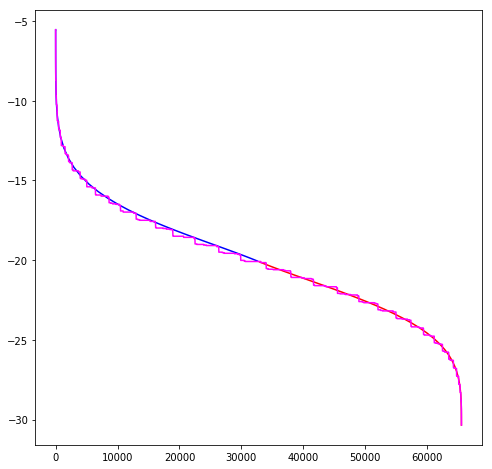

In [18]:
start = time.time()

plt.figure(figsize=(8,8))

print("Alphabet size:", A)
print("Probability vector:", p)


rel_ent_alphas = []
rel_ent_alphas_ = []
guesswork_approx = []
guesswork_approx_ = []
alphas = np.exp(np.arange(-6, 3, 0.1))
#alphas = np.array([0.00001, 0.01, 0.1, 0.2, 0.35, 0.5, 0.7, 0.8, 1, 1.3, 1.7, 2, 2.2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 7, 10, 20])

for a in alphas:
    log_prob_a = [l * a for l in log_prob]
    log_prob_a_ = [l * -a for l in log_prob]

    prob_a = np.exp(log_prob_a) / sum(np.exp(log_prob_a))
    prob_a_ = np.exp(log_prob_a_) / sum(np.exp(log_prob_a_))

    ent_a = np.sum([-p * np.log2(p) for p in prob_a])
    ent_a_= np.sum([-p * np.log2(p) for p in prob_a_])
    
    var_ent_a = np.sum([p * (np.log2(p) + ent_a)**2 for p in prob_a])
    var_ent_a_ = np.sum([p * (np.log2(p) + ent_a_)**2 for p in prob_a_])
        
    rel_ent_alphas.append(np.sum(np.dot(prob_a, log_prob)))
    rel_ent_alphas_.append(np.sum(np.dot(prob_a_, log_prob)))
        
    guesswork_approx.append(ent_a - np.log2(np.sqrt(math.pi/4 * var_ent_a) + np.sqrt(math.pi/4 * var_ent_a + 4)))
    guesswork_approx_.append(ent_a_ - np.log2(np.sqrt(math.pi/4 *  var_ent_a_) + np.sqrt(math.pi/4 * var_ent_a_ + 4)))


plt.plot([2**(g) - 0.5  for g in guesswork_approx], rel_ent_alphas, color='b')
plt.plot([A**N - 2**(g) - 0.5  for g in guesswork_approx_], rel_ent_alphas_, color='r')
end = time.time()

print('total time for computing the approximation: ', end - start)
plt.plot(log_prob, color='magenta')